In [1]:
from fastai import *
from fastai.collab import *
from fastai.tabular import *

In [2]:
user, item, title = 'userId', 'movieId', 'title'

In [3]:
path = untar_data(URLs.ML_SAMPLE)
path

/Users/bharath/anaconda3/lib/python3.7/site-packages/fastai/datasets.py:75: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  with open(fpath, 'r') as yaml_file: return yaml.load(yaml_file)


PosixPath('/Users/bharath/.fastai/data/movie_lens_sample')

In [5]:
df = pd.read_csv(path/'ratings.csv')
df.head()

,userId,movieId,rating,timestamp
0,73,1097,4.0,1255504951
1,561,924,3.5,1172695223
2,157,260,3.5,1291598691
3,358,1210,5.0,957481884
4,130,316,2.0,1138999234


In [6]:
data = CollabDataBunch.from_df(df, seed=42)
y_range = [0, 5.5]
learn = collab_learner(data, n_factors=50, y_range=y_range)

In [14]:
data.show_batch()

userId,movieId,target
19,47,5.0
481,1213,4.5
73,1270,5.0
23,2396,4.5
598,2028,4.0


In [19]:
data.c

1

In [7]:
learn.fit_one_cycle(3, 5e-3)

epoch,train_loss,valid_loss
1,1.606558,0.958095
2,0.843618,0.674131
3,0.645864,0.662680


In [8]:
learn

CollabLearner(data=TabularDataBunch;

Train: LabelList
y: FloatList (4825 items)
[FloatItem 4.0, FloatItem 3.5, FloatItem 3.5, FloatItem 5.0, FloatItem 2.0]...
Path: .
x: CollabList (4825 items)
[CollabLine userId 73; movieId 1097; , CollabLine userId 561; movieId 924; , CollabLine userId 157; movieId 260; , CollabLine userId 358; movieId 1210; , CollabLine userId 130; movieId 316; ]...
Path: .;

Valid: LabelList
y: FloatList (1206 items)
[FloatItem 3.0, FloatItem 2.0, FloatItem 4.5, FloatItem 4.0, FloatItem 1.5]...
Path: .
x: CollabList (1206 items)
[CollabLine userId 306; movieId 2628; , CollabLine userId 605; movieId 3793; , CollabLine userId 313; movieId 4886; , CollabLine userId 468; movieId 1136; , CollabLine userId 380; movieId 539; ]...
Path: .;

Test: None, model=EmbeddingDotBias(
  (u_weight): Embedding(101, 50)
  (i_weight): Embedding(101, 50)
  (u_bias): Embedding(101, 1)
  (i_bias): Embedding(101, 1)
), opt_func=functools.partial(<class 'torch.optim.adam.Adam'>, betas=(0.9

In [17]:
learn.validate()

[0.6626803]

# MovieLens 100k

In [23]:
path = Config.data_path()/'ml-100k'; path

PosixPath('/Users/bharath/.fastai/data/ml-100k')

In [24]:
ratings = pd.read_csv(path/'u.data', delimiter='\t', header=None,
                     names=[user, item, 'rating', 'timestamp'])
ratings.head()

,userId,movieId,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [25]:
movies = pd.read_csv(path/'u.item',  delimiter='|', encoding='latin-1', header=None,
                 names=[item, 'title', 'date', 'N', 'url', *[f'g{i}' for i in range(19)]])
movies.head()

,movieId,title,date,N,url,g0,g1,g2,g3,g4,...,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [26]:
rating_movie = ratings.merge(movies[[item, title]])
rating_movie.head()

,userId,movieId,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [27]:
data = CollabDataBunch.from_df(rating_movie, seed=42, pct_val=0.1, item_name=title)

In [28]:
data.show_batch()

userId,title,target
396,Eraser (1996),4.0
343,All About Eve (1950),5.0
458,Kingpin (1996),1.0
648,Judge Dredd (1995),3.0
70,Indiana Jones and the Last Crusade (1989),4.0


In [29]:
learn = collab_learner(data, n_factors=40, y_range=y_range, wd=1e-1)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


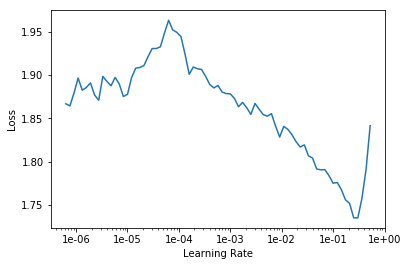

In [30]:
learn.lr_find()
learn.recorder.plot(skip_end=15)

In [31]:
learn.fit_one_cycle(5, 5e-3)

epoch,train_loss,valid_loss
1,0.947344,0.945007
2,0.845371,0.875689
3,0.777493,0.826383
4,0.670600,0.812410
5,0.544885,0.811931


In [33]:
learn.save('dotprod');

In [34]:
learn.load('dotprod');

In [35]:
learn.model

EmbeddingDotBias(
  (u_weight): Embedding(944, 40)
  (i_weight): Embedding(1654, 40)
  (u_bias): Embedding(944, 1)
  (i_bias): Embedding(1654, 1)
)

In [36]:
learn.summary

<bound method model_summary of CollabLearner(data=TabularDataBunch;

Train: LabelList
y: FloatList (90000 items)
[FloatItem 3.0, FloatItem 3.0, FloatItem 5.0, FloatItem 3.0, FloatItem 5.0]...
Path: .
x: CollabList (90000 items)
[CollabLine userId 196; title Kolya (1996); , CollabLine userId 63; title Kolya (1996); , CollabLine userId 226; title Kolya (1996); , CollabLine userId 154; title Kolya (1996); , CollabLine userId 306; title Kolya (1996); ]...
Path: .;

Valid: LabelList
y: FloatList (10000 items)
[FloatItem 3.0, FloatItem 5.0, FloatItem 4.0, FloatItem 3.0, FloatItem 3.0]...
Path: .
x: CollabList (10000 items)
[CollabLine userId 498; title Casino (1995); , CollabLine userId 642; title Pocahontas (1995); , CollabLine userId 58; title 2001: A Space Odyssey (1968); , CollabLine userId 495; title Cat People (1982); , CollabLine userId 618; title Philadelphia (1993); ]...
Path: .;

Test: None, model=EmbeddingDotBias(
  (u_weight): Embedding(944, 40)
  (i_weight): Embedding(1654, 40)


In [37]:
g = rating_movie.groupby(title)['rating'].count()
top_movies = g.sort_values(ascending=False).index.values[:1000]
top_movies[:10]

array(['Star Wars (1977)', 'Contact (1997)', 'Fargo (1996)', 'Return of the Jedi (1983)', 'Liar Liar (1997)',
       'English Patient, The (1996)', 'Scream (1996)', 'Toy Story (1995)', 'Air Force One (1997)',
       'Independence Day (ID4) (1996)'], dtype=object)

# Movie bias

In [55]:
movie_bias = learn.bias(top_movies, is_item=True)
movie_bias.shape

torch.Size([1000])

In [57]:
mean_ratings = rating_movie.groupby(title)['rating'].mean()

In [58]:
mean_ratings.head()

title
'Til There Was You (1997)    2.333333
1-900 (1994)                 2.600000
101 Dalmatians (1996)        2.908257
12 Angry Men (1957)          4.344000
187 (1997)                   3.024390
Name: rating, dtype: float64

In [59]:
movie_ratings = [(b, i, mean_ratings.loc[i]) for i,b in zip(top_movies,movie_bias)]

In [60]:
item0 = lambda o:o[0]

In [61]:
sorted(movie_ratings, key=item0)[:15]

[(tensor(-0.3720),
  'Children of the Corn: The Gathering (1996)',
  1.3157894736842106),
 (tensor(-0.3230),
  'Lawnmower Man 2: Beyond Cyberspace (1996)',
  1.7142857142857142),
 (tensor(-0.3004), 'Mortal Kombat: Annihilation (1997)', 1.9534883720930232),
 (tensor(-0.2730), 'Striptease (1996)', 2.2388059701492535),
 (tensor(-0.2661), 'Grease 2 (1982)', 2.0),
 (tensor(-0.2591), 'Cable Guy, The (1996)', 2.339622641509434),
 (tensor(-0.2493), 'Barb Wire (1996)', 1.9333333333333333),
 (tensor(-0.2458), 'Island of Dr. Moreau, The (1996)', 2.1578947368421053),
 (tensor(-0.2410), 'Free Willy 3: The Rescue (1997)', 1.7407407407407407),
 (tensor(-0.2405), 'Crow: City of Angels, The (1996)', 1.9487179487179487),
 (tensor(-0.2400), "McHale's Navy (1997)", 2.1884057971014492),
 (tensor(-0.2317), 'Bio-Dome (1996)', 1.903225806451613),
 (tensor(-0.2291), 'Thinner (1996)', 2.4489795918367347),
 (tensor(-0.2254), "Joe's Apartment (1996)", 2.2444444444444445),
 (tensor(-0.2211), 'Showgirls (1995)', 1.

In [62]:
sorted(movie_ratings, key=lambda o: o[0], reverse=True)[:15]

[(tensor(0.6039), "Schindler's List (1993)", 4.466442953020135),
 (tensor(0.5660), 'Shawshank Redemption, The (1994)', 4.445229681978798),
 (tensor(0.5613), 'Titanic (1997)', 4.2457142857142856),
 (tensor(0.5342), 'Silence of the Lambs, The (1991)', 4.28974358974359),
 (tensor(0.5289), 'L.A. Confidential (1997)', 4.161616161616162),
 (tensor(0.5270), 'Good Will Hunting (1997)', 4.262626262626263),
 (tensor(0.5260), 'Star Wars (1977)', 4.3584905660377355),
 (tensor(0.5257), 'Rear Window (1954)', 4.3875598086124405),
 (tensor(0.5055), 'Casablanca (1942)', 4.45679012345679),
 (tensor(0.4857), 'Vertigo (1958)', 4.251396648044692),
 (tensor(0.4816), 'As Good As It Gets (1997)', 4.196428571428571),
 (tensor(0.4775), 'Godfather, The (1972)', 4.283292978208232),
 (tensor(0.4764), 'Apt Pupil (1998)', 4.1),
 (tensor(0.4601), 'Boot, Das (1981)', 4.203980099502488),
 (tensor(0.4369), 'Much Ado About Nothing (1993)', 4.0625)]

In [63]:
movie_w = learn.weight(top_movies, is_item=True)
movie_w.shape

torch.Size([1000, 40])

In [64]:
movie_pca = movie_w.pca(3)
movie_pca.shape

torch.Size([1000, 3])

In [65]:
fac0,fac1,fac2 = movie_pca.t()
movie_comp = [(f, i) for f,i in zip(fac0, top_movies)]

In [66]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(1.1012), 'Wrong Trousers, The (1993)'),
 (tensor(1.0642), 'Close Shave, A (1995)'),
 (tensor(1.0515), 'Chinatown (1974)'),
 (tensor(1.0327), 'Casablanca (1942)'),
 (tensor(1.0130), 'When We Were Kings (1996)'),
 (tensor(1.0013), 'Lawrence of Arabia (1962)'),
 (tensor(0.9923), 'Ran (1985)'),
 (tensor(0.9724), 'Godfather, The (1972)'),
 (tensor(0.9644), 'Shall We Dance? (1996)'),
 (tensor(0.9449), 'Apocalypse Now (1979)')]

In [67]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(tensor(-1.3294), 'Home Alone 3 (1997)'),
 (tensor(-1.2119), 'Jungle2Jungle (1997)'),
 (tensor(-1.1609), 'Leave It to Beaver (1997)'),
 (tensor(-1.1539), 'Bio-Dome (1996)'),
 (tensor(-1.1310), "McHale's Navy (1997)"),
 (tensor(-1.1214), 'Congo (1995)'),
 (tensor(-1.1163), 'Children of the Corn: The Gathering (1996)'),
 (tensor(-1.0782), 'D3: The Mighty Ducks (1996)'),
 (tensor(-1.0653), 'Free Willy 3: The Rescue (1997)'),
 (tensor(-1.0600), 'Batman & Robin (1997)')]

In [68]:
movie_comp = [(f, i) for f,i in zip(fac1, top_movies)]

In [69]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(1.1466), 'Raiders of the Lost Ark (1981)'),
 (tensor(1.1407), 'Titanic (1997)'),
 (tensor(1.1323), 'Braveheart (1995)'),
 (tensor(0.9227), 'Return of the Jedi (1983)'),
 (tensor(0.9092), 'Star Wars (1977)'),
 (tensor(0.8949), "It's a Wonderful Life (1946)"),
 (tensor(0.8937), 'Forrest Gump (1994)'),
 (tensor(0.8790), 'Affair to Remember, An (1957)'),
 (tensor(0.8701), 'Back to the Future (1985)'),
 (tensor(0.8556), 'Pretty Woman (1990)')]

In [70]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(tensor(-0.9192), 'Keys to Tulsa (1997)'),
 (tensor(-0.8279), 'Nosferatu (Nosferatu, eine Symphonie des Grauens) (1922)'),
 (tensor(-0.7992), 'Ready to Wear (Pret-A-Porter) (1994)'),
 (tensor(-0.7713), 'Trainspotting (1996)'),
 (tensor(-0.7609), 'Very Brady Sequel, A (1996)'),
 (tensor(-0.7599), 'Heavenly Creatures (1994)'),
 (tensor(-0.7464), 'Jude (1996)'),
 (tensor(-0.7232), 'Sweet Hereafter, The (1997)'),
 (tensor(-0.7182), 'Dead Man (1995)'),
 (tensor(-0.7085), 'Stuart Saves His Family (1995)')]

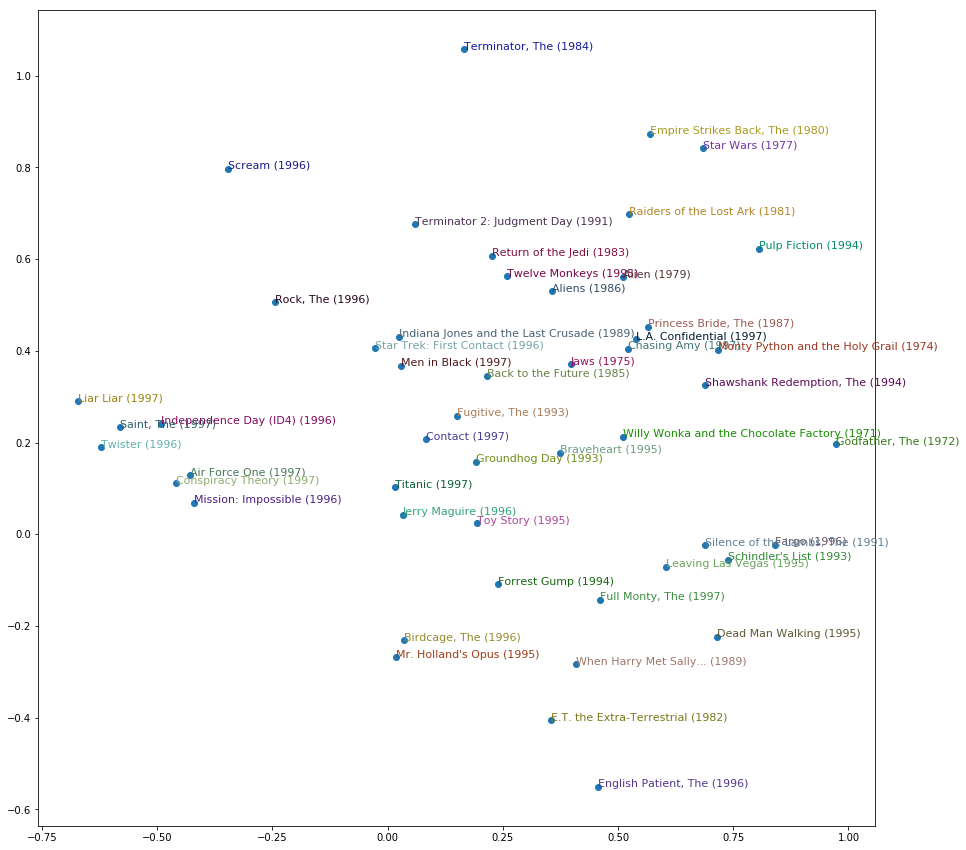

In [71]:
idxs = np.random.choice(len(top_movies), 50, replace=False)
idxs = list(range(50))
X = fac0[idxs]
Y = fac2[idxs]
plt.figure(figsize=(15,15))
plt.scatter(X, Y)
for i, x, y in zip(top_movies[idxs], X, Y):
    plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=11)
plt.show()